Langkah-langkah
1. Load data
2. EDA
3. Visualisasi data
4. Split data
5. Train data
6. Compare model
7. Save model terbaik

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## 1. Loading Data

Dataset:
[https://www.kaggle.com/datasets/eswarchandt/phishing-website-detector](https://www.kaggle.com/datasets/eswarchandt/phishing-website-detector)

```
1 = Tidak Phising
0 = Netral
-1 = Phising
```

In [3]:
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA

In [4]:
data.shape

(11054, 32)

In [5]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [7]:
data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [8]:
data = data.drop(['Index'], axis=1)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


1. Ada 11054 contoh dan 31 fitur
2. 30 data daintaranya adaalh fitur independen dimana 1 adalah fitur dependen 
3. Setiap fitur bertipe data integer, jadi tidak perlu menggunakan label encoder
4. Tidak ada outlier
5. Tidak ada missing value

## 3. Visualisasi Data

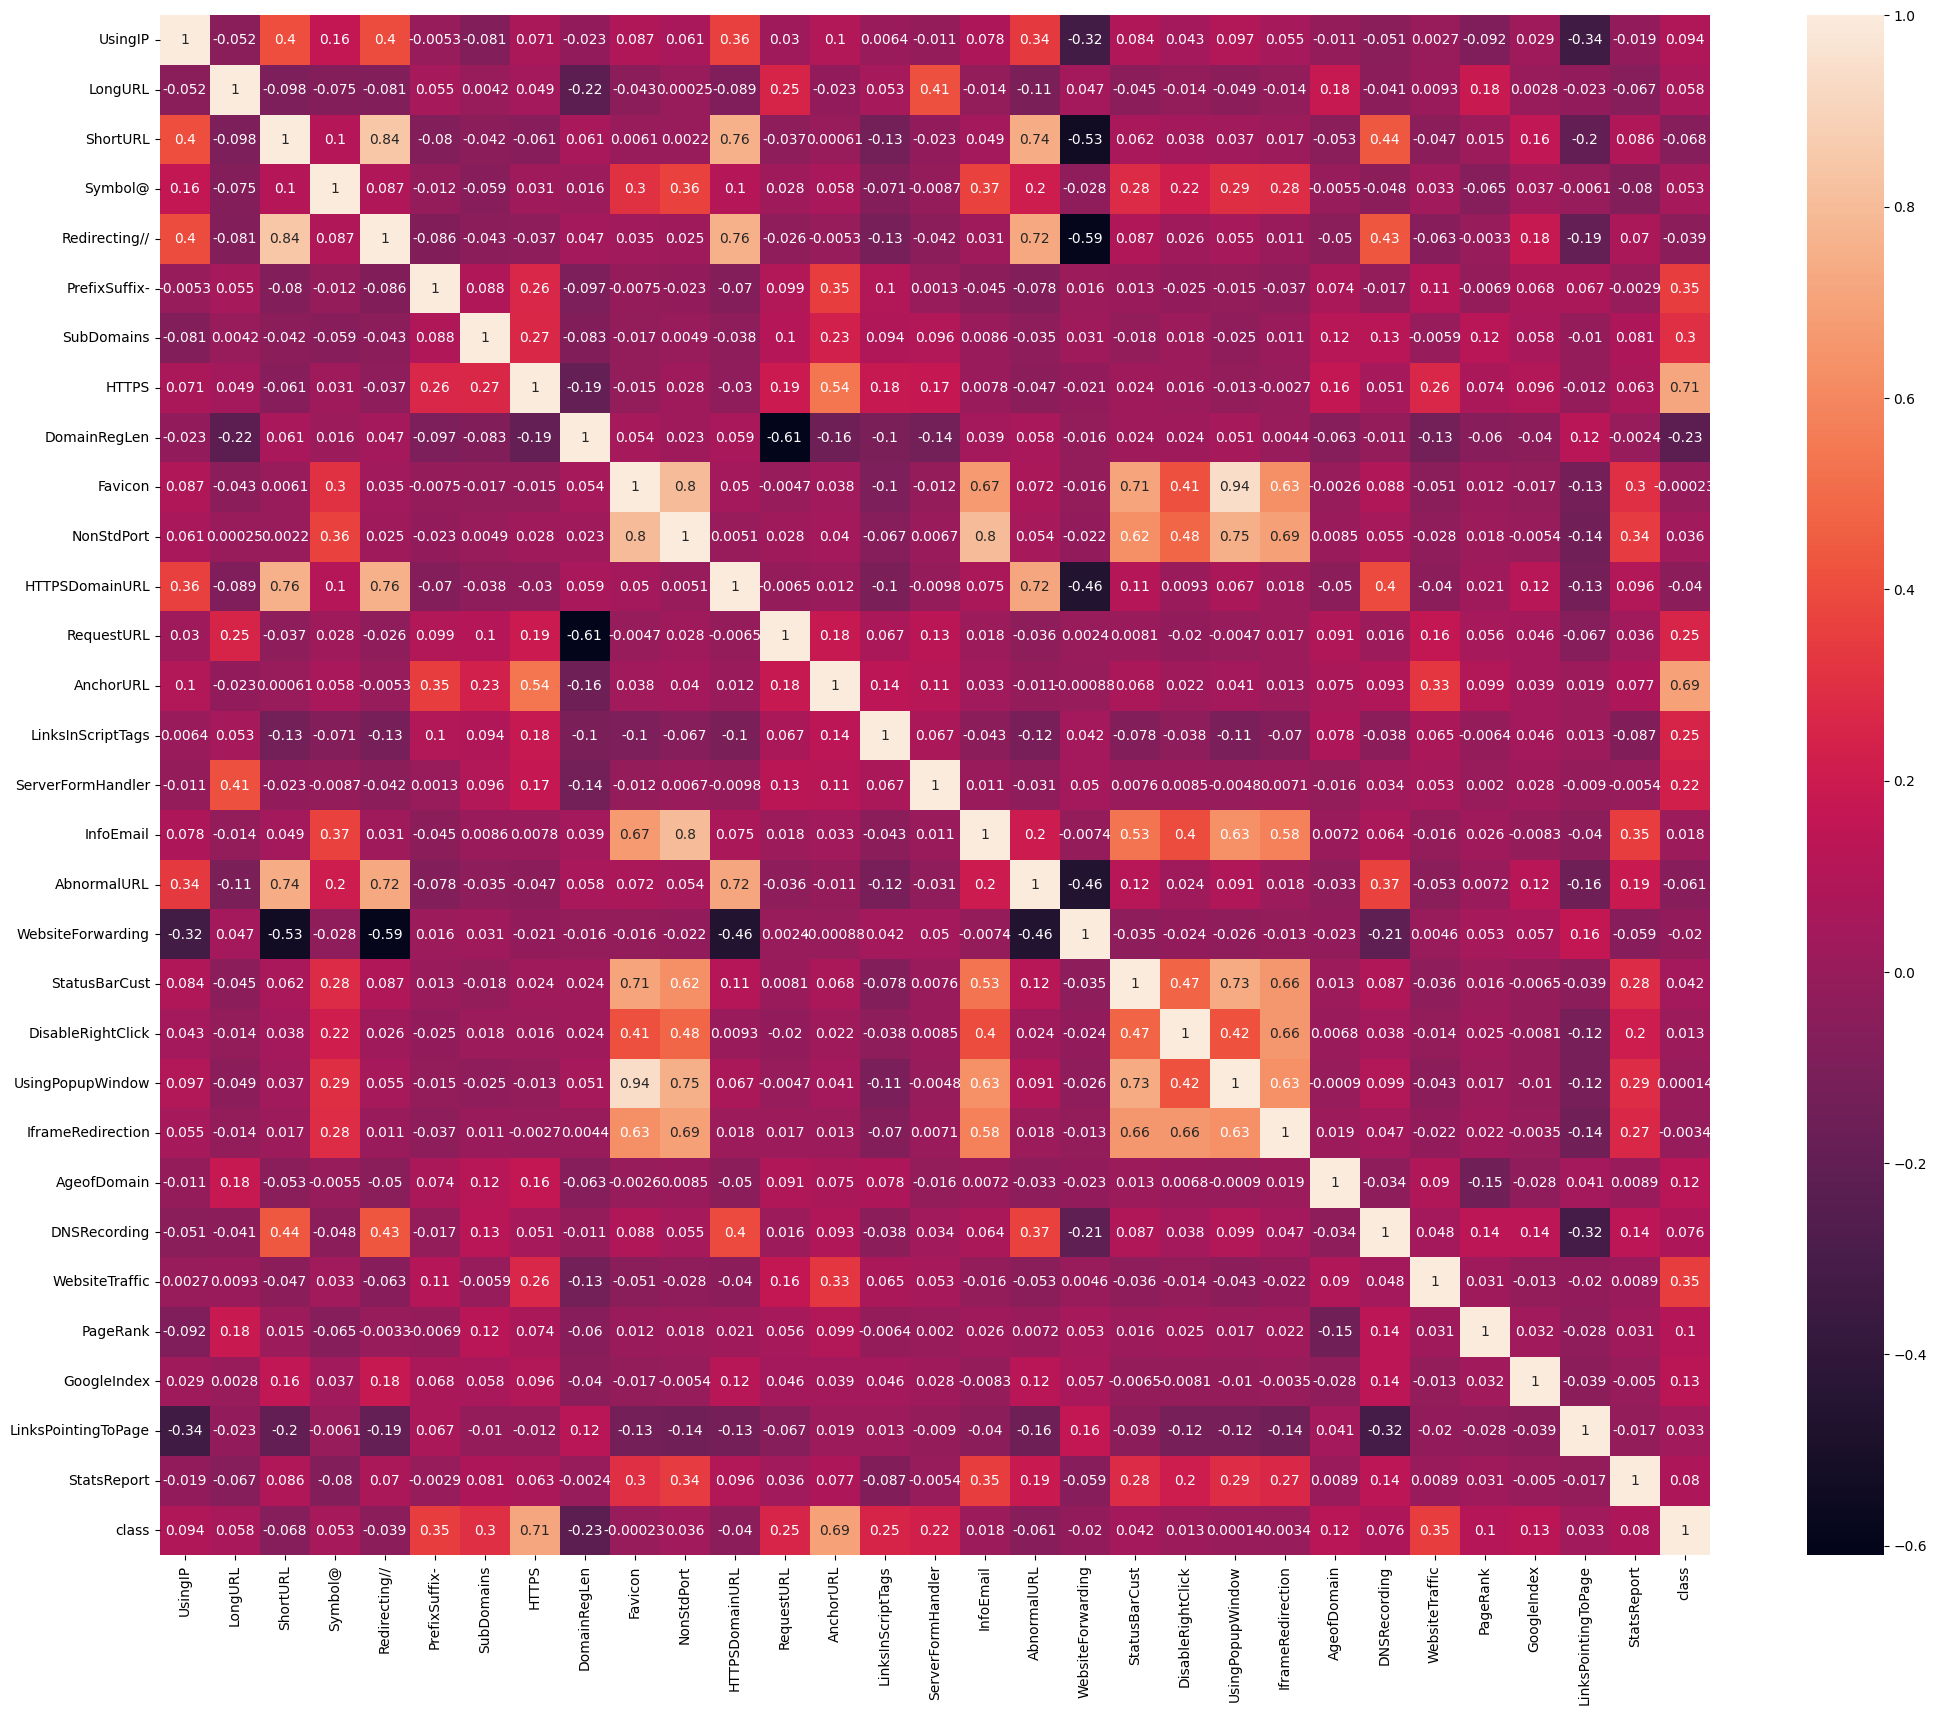

In [10]:
# Correlation Heatmap

plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

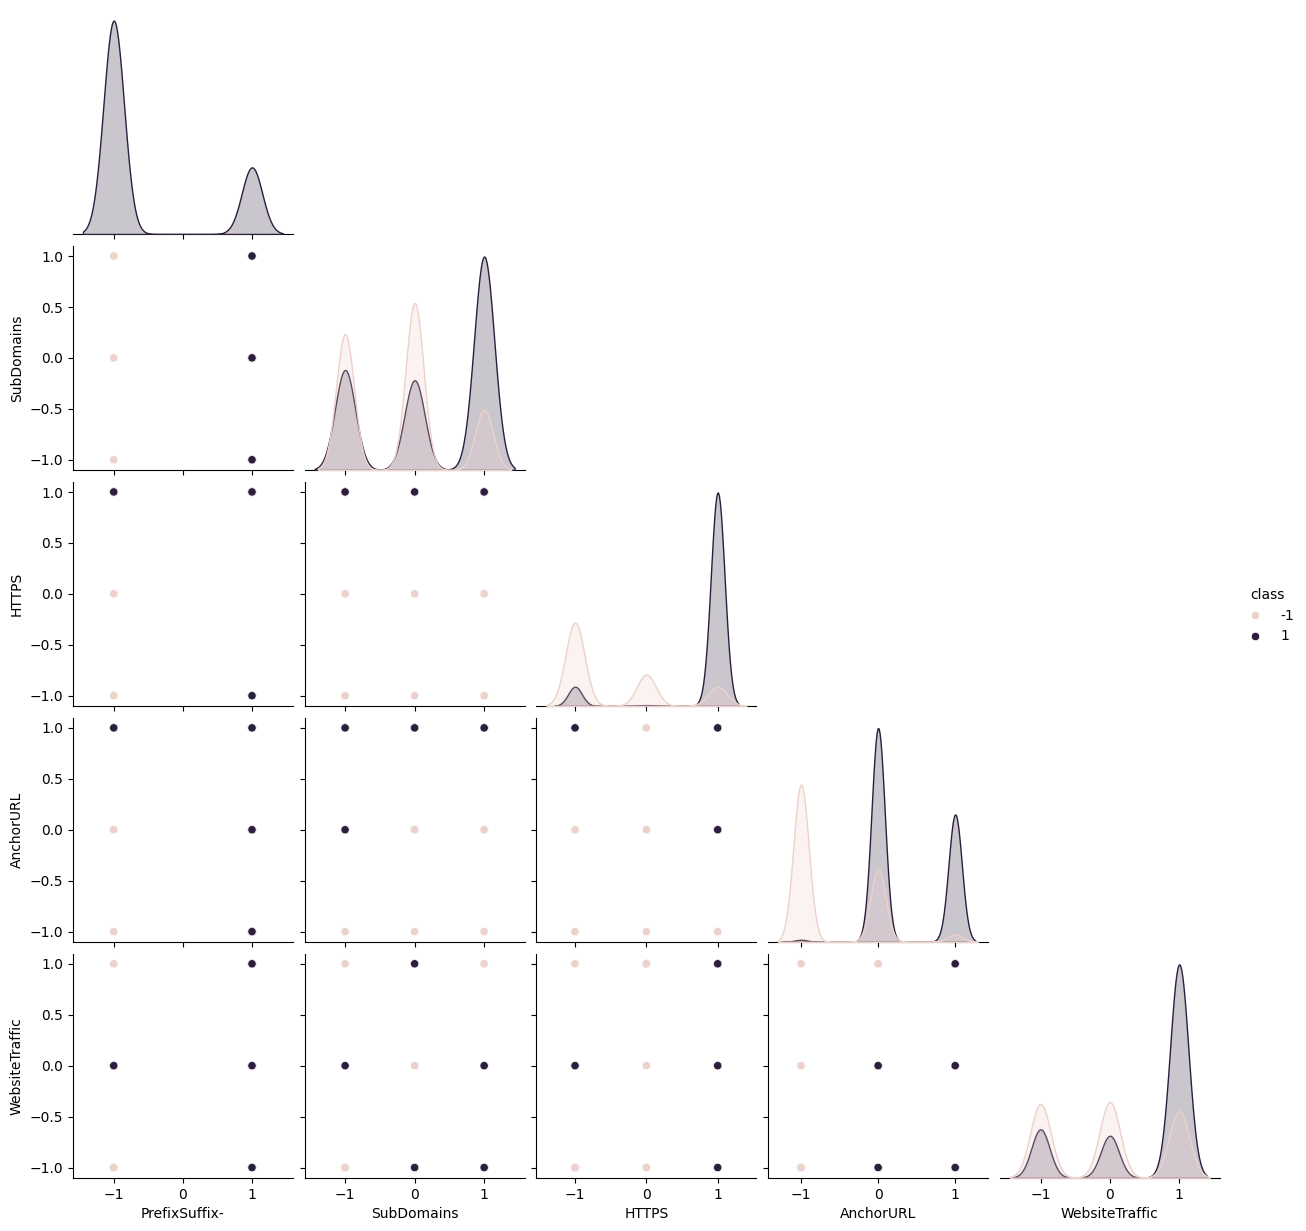

In [11]:
# Pairplot

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS', 'AnchorURL', 'WebsiteTraffic', 'class']]
sns.pairplot(data = df, hue="class", corner=True)

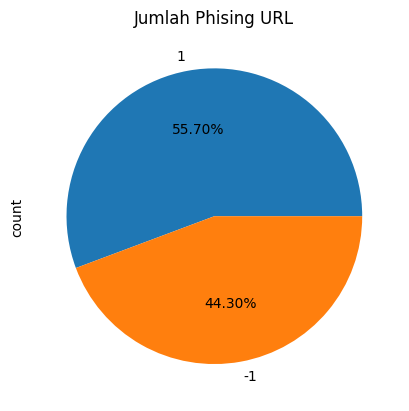

In [12]:
# Pie Chart
data['class'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Jumlah Phising URL")
plt.show()

## 4. Split Data

In [13]:
# Memisahkan dataset menjadi fitur dependen dan independen

X = data.drop(["class"], axis=1)
y = data["class"]

In [14]:
# Membagi dataset menjadi train dan test dalam pembagian 80:20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

## 5. Model Building & Training

1. Logistic Regression
2. K-Nearest Neighbors
3. Supprot Vector Classifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Multilayer Perceptrons

In [15]:
# Membuat haler untuk menyimpan hasil performa model
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

# Fungsi untuk memanggil dan menyimpan hasil
def store_results(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a,3))
    f1_score.append(round(b,3))
    recall.append(round(c,3))
    precision.append(round(d,3))

#### 5.1 Logistic Regression

In [16]:
# Linear regression model
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import pipeline

# Instance model
lr = LogisticRegression()

# Fit the model
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
# Prediksi nilai target dan model untuk sampel

y_train_lr = lr.predict(X_train)
y_test_lr = lr.predict(X_test)

In [18]:
# Akurasi, F1 Score, Recall, Precision model

acc_train_lr = metrics.accuracy_score(y_train, y_train_lr)
acc_test_lr = metrics.accuracy_score(y_test, y_test_lr)
print("Logistic Regression : Akurasi Data Training: {:.3f}".format(acc_train_lr))
print("Logistic Regression : Akurasi Data Testing: {:.3f}".format(acc_test_lr))
print()

f1_score_train_lr = metrics.f1_score(y_train, y_train_lr)
f1_score_test_lr = metrics.f1_score(y_test, y_test_lr)
print("Logistic Regression : F1 score Data Training: {:.3f}".format(f1_score_train_lr))
print("Logistic Regression : F1 Score Data Testing: {:.3f}".format(f1_score_test_lr))
print()

recall_score_train_lr = metrics.recall_score(y_train, y_train_lr)
recall_score_test_lr = metrics.recall_score(y_test, y_test_lr)
print("Logistic Regression : Recall Score Data Training: {:.3f}".format(recall_score_train_lr))
print("Logistic Regression : Recall Score Data Testing: {:.3f}".format(recall_score_test_lr))
print()

precision_score_train_lr = metrics.precision_score(y_train, y_train_lr)
precision_score_test_lr = metrics.precision_score(y_test, y_test_lr)
print("Logistic Regression : Precision Score Data Training: {:.3f}".format(precision_score_train_lr))
print("Logistic Regression : Precision Score Data Testing: {:.3f}".format(precision_score_test_lr))
print()

Logistic Regression : Akurasi Data Training: 0.927
Logistic Regression : Akurasi Data Testing: 0.934

Logistic Regression : F1 score Data Training: 0.935
Logistic Regression : F1 Score Data Testing: 0.941

Logistic Regression : Recall Score Data Training: 0.943
Logistic Regression : Recall Score Data Testing: 0.953

Logistic Regression : Precision Score Data Training: 0.927
Logistic Regression : Precision Score Data Testing: 0.930



In [19]:
# Classification Report 

print(metrics.classification_report(y_test, y_test_lr))
print(metrics.confusion_matrix(y_test, y_test_lr))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

[[ 887   89]
 [  58 1177]]


In [20]:
# Menyimpan hasil performa model

store_results('Logistic Regression', acc_test_lr, f1_score_test_lr, recall_score_test_lr, precision_score_test_lr)

#### 5.2 K-Nearest Neighbors

In [21]:
# Decision tree model
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import pipeline

# Instance model
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [23]:
# Akurasi, F1 Score, Recall, Precision model

acc_train_knn = metrics.accuracy_score(y_train, y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test, y_test_knn)
print("KNN : Akurasi Data Training: {:.3f}".format(acc_train_knn))
print("KNN : Akurasi Data Testing: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train, y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test, y_test_knn)
print("KNN : F1 score Data Training: {:.3f}".format(f1_score_train_knn))
print("KNN : F1 Score Data Testing: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train, y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test, y_test_knn)
print("KNN : Recall Score Data Training: {:.3f}".format(recall_score_train_knn))
print("KNN : Recall Score Data Testing: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train, y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test, y_test_knn)
print("KNN : Precision Score Data Training: {:.3f}".format(precision_score_train_knn))
print("KNN : Precision Score Data Testing: {:.3f}".format(precision_score_test_knn))
print()

KNN : Akurasi Data Training: 0.988
KNN : Akurasi Data Testing: 0.959

KNN : F1 score Data Training: 0.990
KNN : F1 Score Data Testing: 0.963

KNN : Recall Score Data Training: 0.988
KNN : Recall Score Data Testing: 0.964

KNN : Precision Score Data Training: 0.991
KNN : Precision Score Data Testing: 0.963



In [24]:
# Classification Report 

print(metrics.classification_report(y_test, y_test_knn))
print(metrics.confusion_matrix(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

[[ 930   46]
 [  45 1190]]


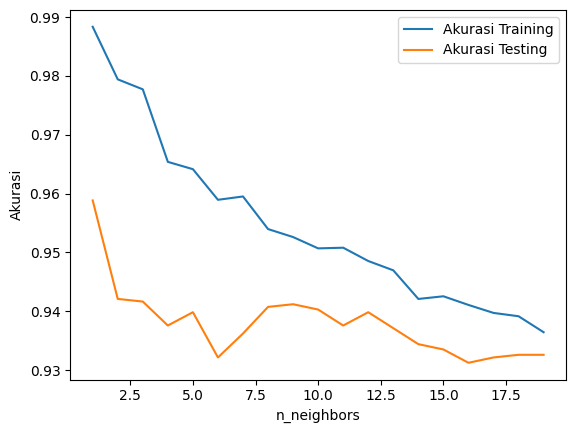

In [25]:
training_accuracy = []
testing_accuracy = []

# max depth dari rentang 1-20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record akurasi training dan testing
    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))

plt.plot(depth, training_accuracy, label="Akurasi Training")
plt.plot(depth, testing_accuracy, label="Akurasi Testing")
plt.ylabel("Akurasi")
plt.xlabel("n_neighbors")
plt.legend()

In [26]:
# Menyimpan hasil performa model

store_results('KNN', acc_test_knn, f1_score_test_knn, recall_score_test_knn, precision_score_test_knn)

#### 5.3 Supprot Vector Classifier

In [27]:
# Support Vector Machine model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma':[0.1], 'kernel':['rbf', 'linear']}

# Instance model
svc = GridSearchCV(SVC(), param_grid)

# Fit the model
svc.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'gamma': [0.1], 'kernel': ['rbf', 'linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [28]:
# Prediksi nilai target dan model untuk sampel

y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [29]:
# Akurasi, F1 Score, Recall, Precision model

acc_train_svc = metrics.accuracy_score(y_train, y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test, y_test_svc)
print("Support Vector Classifier : Akurasi Data Training: {:.3f}".format(acc_train_svc))
print("Support Vector Classifier : Akurasi Data Testing: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train, y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test, y_test_svc)
print("Support Vector Classifier : F1 score Data Training: {:.3f}".format(f1_score_train_svc))
print("Support Vector Classifier : F1 Score Data Testing: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train, y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test, y_test_svc)
print("Support Vector Classifier : Recall Score Data Training: {:.3f}".format(recall_score_train_svc))
print("Support Vector Classifier : Recall Score Data Testing: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train, y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test, y_test_svc)
print("Support Vector Classifier : Precision Score Data Training: {:.3f}".format(precision_score_train_svc))
print("Support Vector Classifier : Precision Score Data Testing: {:.3f}".format(precision_score_test_svc))
print()

Support Vector Classifier : Akurasi Data Training: 0.969
Support Vector Classifier : Akurasi Data Testing: 0.964

Support Vector Classifier : F1 score Data Training: 0.973
Support Vector Classifier : F1 Score Data Testing: 0.968

Support Vector Classifier : Recall Score Data Training: 0.980
Support Vector Classifier : Recall Score Data Testing: 0.980

Support Vector Classifier : Precision Score Data Training: 0.965
Support Vector Classifier : Precision Score Data Testing: 0.957



In [30]:
# Classification Report 

print(metrics.classification_report(y_test, y_test_svc))
print(metrics.confusion_matrix(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

[[ 922   54]
 [  25 1210]]


In [31]:
# Menyimpan hasil performa model

store_results('Support Vector Classifier', acc_test_svc, f1_score_test_svc, recall_score_test_svc, precision_score_test_svc)

#### 5.4 Naive Bayes

In [32]:
from sklearn.naive_bayes import BernoulliNB
#from sklearn.pipeline import pipeline

# Instance model
nb = BernoulliNB()
# Fit the model 
nb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [33]:
# Prediksi nilai target dan model untuk sampel

y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [34]:
# Akurasi, F1 Score, Recall, Precision model

acc_train_nb = metrics.accuracy_score(y_train, y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test, y_test_nb)
print("Naive Bayes : Akurasi Data Training: {:.3f}".format(acc_train_nb))
print("Naive Bayes : Akurasi Data Testing: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train, y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test, y_test_nb)
print("Naive Bayes : F1 score Data Training: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes : F1 Score Data Testing: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train, y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test, y_test_nb)
print("Naive Bayes : Recall Score Data Training: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes : Recall Score Data Testing: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train, y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test, y_test_nb)
print("Naive Bayes : Precision Score Data Training: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes : Precision Score Data Testing: {:.3f}".format(precision_score_test_nb))
print()

Naive Bayes : Akurasi Data Training: 0.905
Naive Bayes : Akurasi Data Testing: 0.910

Naive Bayes : F1 score Data Training: 0.914
Naive Bayes : F1 Score Data Testing: 0.919

Naive Bayes : Recall Score Data Training: 0.912
Naive Bayes : Recall Score Data Testing: 0.913

Naive Bayes : Precision Score Data Training: 0.916
Naive Bayes : Precision Score Data Testing: 0.925



In [35]:
# Classification Report 

print(metrics.classification_report(y_test, y_test_nb))
print(metrics.confusion_matrix(y_test, y_test_nb))

              precision    recall  f1-score   support

          -1       0.89      0.91      0.90       976
           1       0.92      0.91      0.92      1235

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211

[[ 884   92]
 [ 107 1128]]


In [36]:
# Menyimpan hasil performa model

store_results('Naive Bayes', acc_test_nb, f1_score_test_nb, recall_score_test_nb, precision_score_test_nb)

#### 5.5 Decision Tree

In [37]:
# Decision tree model
from sklearn.tree import DecisionTreeClassifier
#from sklearn.pipeline import pipeline

# Instance model
dtc = DecisionTreeClassifier(max_depth=30)

# Fit the model
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
# Prediksi nilai target dan model untuk sampel

y_train_dtc = dtc.predict(X_train)
y_test_dtc = dtc.predict(X_test)

In [39]:
# Akurasi, F1 Score, Recall, Precision model

acc_train_dtc = metrics.accuracy_score(y_train, y_train_dtc)
acc_test_dtc = metrics.accuracy_score(y_test, y_test_dtc)
print("Decision Tree : Akurasi Data Training: {:.3f}".format(acc_train_dtc))
print("Decision Tree : Akurasi Data Testing: {:.3f}".format(acc_test_dtc))
print()

f1_score_train_dtc = metrics.f1_score(y_train, y_train_dtc)
f1_score_test_dtc = metrics.f1_score(y_test, y_test_dtc)
print("Decision Tree : F1 score Data Training: {:.3f}".format(f1_score_train_dtc))
print("Decision Tree : F1 Score Data Testing: {:.3f}".format(f1_score_test_dtc))
print()

recall_score_train_dtc = metrics.recall_score(y_train, y_train_dtc)
recall_score_test_dtc = metrics.recall_score(y_test, y_test_dtc)
print("Decision Tree : Recall Score Data Training: {:.3f}".format(recall_score_train_dtc))
print("Decision Tree : Recall Score Data Testing: {:.3f}".format(recall_score_test_dtc))
print()

precision_score_train_dtc = metrics.precision_score(y_train, y_train_dtc)
precision_score_test_dtc = metrics.precision_score(y_test, y_test_dtc)
print("Decision Tree : Precision Score Data Training: {:.3f}".format(precision_score_train_dtc))
print("Decision Tree : Precision Score Data Testing: {:.3f}".format(precision_score_test_dtc))
print()

Decision Tree : Akurasi Data Training: 0.991
Decision Tree : Akurasi Data Testing: 0.959

Decision Tree : F1 score Data Training: 0.992
Decision Tree : F1 Score Data Testing: 0.963

Decision Tree : Recall Score Data Training: 0.991
Decision Tree : Recall Score Data Testing: 0.962

Decision Tree : Precision Score Data Training: 0.993
Decision Tree : Precision Score Data Testing: 0.964



In [40]:
# Classification Report 

print(metrics.classification_report(y_test, y_test_dtc))
print(metrics.confusion_matrix(y_test, y_test_dtc))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

[[ 932   44]
 [  47 1188]]


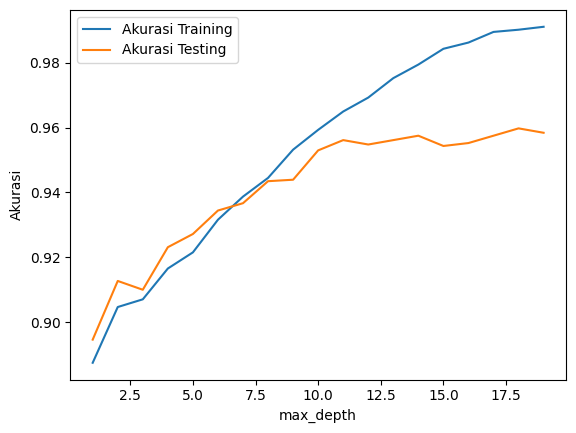

In [41]:
training_accuracy = []
testing_accuracy = []

# max depth dari rentang 1-20
depth = range(1,20)
for n in depth:
    dtc = DecisionTreeClassifier(max_depth=n)

    dtc.fit(X_train, y_train)
    # record akurasi training dan testing
    training_accuracy.append(dtc.score(X_train, y_train))
    testing_accuracy.append(dtc.score(X_test, y_test))

plt.plot(depth, training_accuracy, label="Akurasi Training")
plt.plot(depth, testing_accuracy, label="Akurasi Testing")
plt.ylabel("Akurasi")
plt.xlabel("max_depth")
plt.legend()

In [42]:
# Menyimpan hasil performa model

store_results('Decision Tree', acc_test_dtc, f1_score_test_dtc, recall_score_test_dtc, precision_score_test_dtc)

#### 5.6 Random Forest

In [43]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Instance model
rf = RandomForestClassifier(n_estimators=10)

# Fit the model
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

In [45]:
# Akurasi, F1 Score, Recall, Precision model

acc_train_rf = metrics.accuracy_score(y_train, y_train_rf)
acc_test_rf = metrics.accuracy_score(y_test, y_test_rf)
print("Random Forest : Akurasi Data Training: {:.3f}".format(acc_train_rf))
print("Random Forest : Akurasi Data Testing: {:.3f}".format(acc_test_rf))
print()

f1_score_train_rf = metrics.f1_score(y_train, y_train_rf)
f1_score_test_rf = metrics.f1_score(y_test, y_test_rf)
print("Random Forest : F1 score Data Training: {:.3f}".format(f1_score_train_rf))
print("Random Forest : F1 Score Data Testing: {:.3f}".format(f1_score_test_rf))
print()

recall_score_train_rf = metrics.recall_score(y_train, y_train_rf)
recall_score_test_rf = metrics.recall_score(y_test, y_test_rf)
print("Random Forest : Recall Score Data Training: {:.3f}".format(recall_score_train_rf))
print("Random Forest : Recall Score Data Testing: {:.3f}".format(recall_score_test_rf))
print()

precision_score_train_rf = metrics.precision_score(y_train, y_train_rf)
precision_score_test_rf = metrics.precision_score(y_test, y_test_rf)
print("Random Forest : Precision Score Data Training: {:.3f}".format(precision_score_train_rf))
print("Random Forest : Precision Score Data Testing: {:.3f}".format(precision_score_test_rf))
print()

Random Forest : Akurasi Data Training: 0.990
Random Forest : Akurasi Data Testing: 0.964

Random Forest : F1 score Data Training: 0.991
Random Forest : F1 Score Data Testing: 0.968

Random Forest : Recall Score Data Training: 0.992
Random Forest : Recall Score Data Testing: 0.968

Random Forest : Precision Score Data Training: 0.990
Random Forest : Precision Score Data Testing: 0.967



In [46]:
# Classification Report 

print(metrics.classification_report(y_test, y_test_rf))
print(metrics.confusion_matrix(y_test, y_test_rf))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

[[ 935   41]
 [  39 1196]]


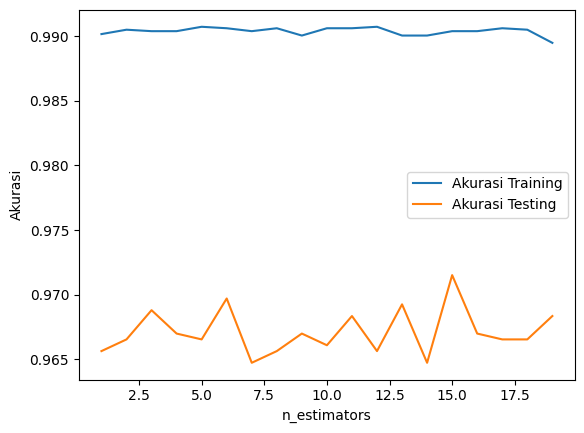

In [47]:
training_accuracy = []
testing_accuracy = []

# max depth dari rentang 1-20
depth = range(1,20)
for n in depth:
    rf = RandomForestClassifier(n_estimators=10)

    rf.fit(X_train, y_train)
    # record akurasi training dan testing
    training_accuracy.append(rf.score(X_train, y_train))
    testing_accuracy.append(rf.score(X_test, y_test))

plt.plot(depth, training_accuracy, label="Akurasi Training")
plt.plot(depth, testing_accuracy, label="Akurasi Testing")
plt.ylabel("Akurasi")
plt.xlabel("n_estimators")
plt.legend()

In [48]:
store_results('Random Forest', acc_test_rf, f1_score_test_rf, 
              recall_score_test_rf, precision_score_test_rf)

#### 5.7 Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Instance model
gb = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)

# Fit the model
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.7
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [50]:
y_train_gb = gb.predict(X_train)
y_test_gb = gb.predict(X_test)

In [51]:
# Akurasi, F1 Score, Recall, Precision model

acc_train_gb = metrics.accuracy_score(y_train, y_train_gb)
acc_test_gb = metrics.accuracy_score(y_test, y_test_gb)
print("Gradient Boosting : Akurasi Data Training: {:.3f}".format(acc_train_gb))
print("Gradient Boosting : Akurasi Data Testing: {:.3f}".format(acc_test_gb))
print()

f1_score_train_gb = metrics.f1_score(y_train, y_train_gb)
f1_score_test_gb = metrics.f1_score(y_test, y_test_gb)
print("Gradient Boosting : F1 score Data Training: {:.3f}".format(f1_score_train_gb))
print("Gradient Boosting : F1 Score Data Testing: {:.3f}".format(f1_score_test_gb))
print()

recall_score_train_gb = metrics.recall_score(y_train, y_train_gb)
recall_score_test_gb = metrics.recall_score(y_test, y_test_gb)
print("Gradient Boosting : Recall Score Data Training: {:.3f}".format(recall_score_train_gb))
print("Gradient Boosting : Recall Score Data Testing: {:.3f}".format(recall_score_test_gb))
print()

precision_score_train_gb = metrics.precision_score(y_train, y_train_gb)
precision_score_test_gb = metrics.precision_score(y_test, y_test_gb)
print("Gradient Boosting : Precision Score Data Training: {:.3f}".format(precision_score_train_gb))
print("Gradient Boosting : Precision Score Data Testing: {:.3f}".format(precision_score_test_gb))
print()

Gradient Boosting : Akurasi Data Training: 0.989
Gradient Boosting : Akurasi Data Testing: 0.974

Gradient Boosting : F1 score Data Training: 0.990
Gradient Boosting : F1 Score Data Testing: 0.977

Gradient Boosting : Recall Score Data Training: 0.994
Gradient Boosting : Recall Score Data Testing: 0.989

Gradient Boosting : Precision Score Data Training: 0.986
Gradient Boosting : Precision Score Data Testing: 0.966



In [52]:
# Classification Report 

print(metrics.classification_report(y_test, y_test_gb))
print(metrics.confusion_matrix(y_test, y_test_gb))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

[[ 933   43]
 [  14 1221]]


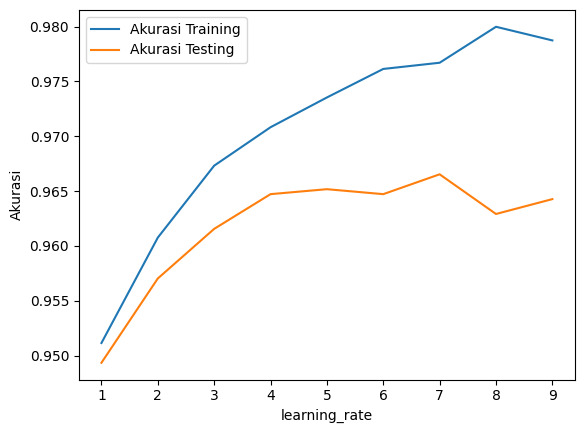

In [53]:
training_accuracy = []
testing_accuracy = []

# max depth dari rentang 1-20
depth = range(1,10)
for n in depth:
    gb = GradientBoostingClassifier(learning_rate=n*0.1)

    gb.fit(X_train, y_train)
    # record akurasi training dan testing
    training_accuracy.append(gb.score(X_train, y_train))
    testing_accuracy.append(gb.score(X_test, y_test))

plt.figure(figsize=(None))
plt.plot(depth, training_accuracy, label="Akurasi Training")
plt.plot(depth, testing_accuracy, label="Akurasi Testing")
plt.ylabel("Akurasi")
plt.xlabel("learning_rate")
plt.legend()

In [54]:
store_results('Gradient Boosting', acc_test_gb, f1_score_test_gb, 
              recall_score_test_gb, precision_score_test_gb)

#### 5.8 Catboost

In [55]:
from catboost import CatBoostClassifier
#from sklearn.pipeline import pipeline

# Instance model
catboost = CatBoostClassifier(learning_rate=0.1)

# Fit the model
catboost.fit(X_train, y_train)

0:	learn: 0.5487232	total: 153ms	remaining: 2m 33s
1:	learn: 0.4349357	total: 158ms	remaining: 1m 18s
2:	learn: 0.3609236	total: 170ms	remaining: 56.6s
3:	learn: 0.3050829	total: 175ms	remaining: 43.6s
4:	learn: 0.2766620	total: 179ms	remaining: 35.6s
5:	learn: 0.2475476	total: 183ms	remaining: 30.2s
6:	learn: 0.2286637	total: 188ms	remaining: 26.7s
7:	learn: 0.2138754	total: 192ms	remaining: 23.8s
8:	learn: 0.2013643	total: 196ms	remaining: 21.5s
9:	learn: 0.1896378	total: 200ms	remaining: 19.8s
10:	learn: 0.1819539	total: 205ms	remaining: 18.4s
11:	learn: 0.1767867	total: 209ms	remaining: 17.2s
12:	learn: 0.1727735	total: 213ms	remaining: 16.1s
13:	learn: 0.1682578	total: 217ms	remaining: 15.3s
14:	learn: 0.1641759	total: 221ms	remaining: 14.5s
15:	learn: 0.1614218	total: 225ms	remaining: 13.9s
16:	learn: 0.1558968	total: 229ms	remaining: 13.3s
17:	learn: 0.1535881	total: 234ms	remaining: 12.8s
18:	learn: 0.1514228	total: 238ms	remaining: 12.3s
19:	learn: 0.1482580	total: 242ms	remai

0:	learn: 0.5487232	total: 3.46ms	remaining: 3.45s
1:	learn: 0.4349357	total: 8.17ms	remaining: 4.08s
2:	learn: 0.3609236	total: 12.7ms	remaining: 4.23s
3:	learn: 0.3050829	total: 17.2ms	remaining: 4.29s
4:	learn: 0.2766620	total: 21.7ms	remaining: 4.31s
5:	learn: 0.2475476	total: 26.6ms	remaining: 4.4s
6:	learn: 0.2286637	total: 30.8ms	remaining: 4.38s
7:	learn: 0.2138754	total: 35.4ms	remaining: 4.38s
8:	learn: 0.2013643	total: 40.8ms	remaining: 4.49s
9:	learn: 0.1896378	total: 45.4ms	remaining: 4.49s
10:	learn: 0.1819539	total: 49.5ms	remaining: 4.45s
11:	learn: 0.1767867	total: 53.9ms	remaining: 4.44s
12:	learn: 0.1727735	total: 58.5ms	remaining: 4.44s
13:	learn: 0.1682578	total: 63.5ms	remaining: 4.47s
14:	learn: 0.1641759	total: 68ms	remaining: 4.46s
15:	learn: 0.1614218	total: 73.8ms	remaining: 4.54s
16:	learn: 0.1558968	total: 78.5ms	remaining: 4.54s
17:	learn: 0.1535881	total: 83ms	remaining: 4.53s
18:	learn: 0.1514228	total: 92.1ms	remaining: 4.75s
19:	learn: 0.1482580	total:

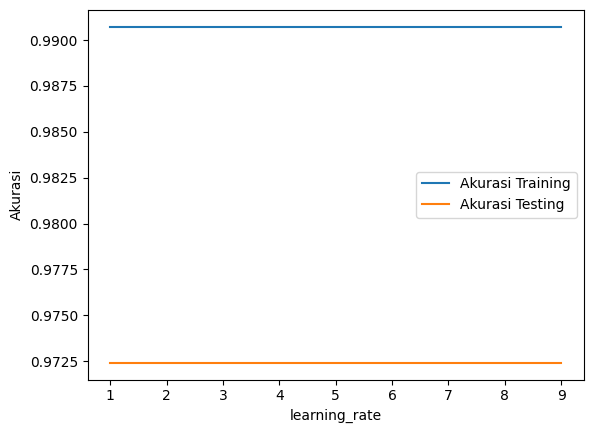

In [56]:
# Plot akurasi training dan testing untuk n_estimators 1-10
training_accuracy = []
testing_accuracy = []

# max depth dari rentang 1-20
depth = range(1,10)
for n in depth:
    cb = CatBoostClassifier(learning_rate=0.1)

    cb.fit(X_train, y_train)
    # record akurasi training dan testing
    training_accuracy.append(cb.score(X_train, y_train))
    testing_accuracy.append(cb.score(X_test, y_test))

plt.figure(figsize=(None))
plt.plot(depth, training_accuracy, label="Akurasi Training")
plt.plot(depth, testing_accuracy, label="Akurasi Testing")
plt.ylabel("Akurasi")
plt.xlabel("learning_rate")
plt.legend()

In [57]:
y_train_cb = catboost.predict(X_train)
y_test_cb = catboost.predict(X_test)

In [58]:
# Akurasi, F1 Score, Recall, Precision model

acc_train_cb = metrics.accuracy_score(y_train, y_train_cb)
acc_test_cb = metrics.accuracy_score(y_test, y_test_cb)
print("Catboost : Akurasi Data Training: {:.3f}".format(acc_train_cb))
print("Catboost : Akurasi Data Testing: {:.3f}".format(acc_test_cb))
print()

f1_score_train_cb = metrics.f1_score(y_train, y_train_cb)
f1_score_test_cb = metrics.f1_score(y_test, y_test_cb)
print("Catboost : F1 score Data Training: {:.3f}".format(f1_score_train_cb))
print("Catboost : F1 Score Data Testing: {:.3f}".format(f1_score_test_cb))
print()

recall_score_train_cb = metrics.recall_score(y_train, y_train_cb)
recall_score_test_cb = metrics.recall_score(y_test, y_test_cb)
print("Catboost : Recall Score Data Training: {:.3f}".format(recall_score_train_cb))
print("Catboost : Recall Score Data Testing: {:.3f}".format(recall_score_test_cb))
print()

precision_score_train_cb = metrics.precision_score(y_train, y_train_cb)
precision_score_test_cb = metrics.precision_score(y_test, y_test_cb)
print("Catboost : Precision Score Data Training: {:.3f}".format(precision_score_train_cb))
print("Catboost : Precision Score Data Testing: {:.3f}".format(precision_score_test_cb))
print()

Catboost : Akurasi Data Training: 0.991
Catboost : Akurasi Data Testing: 0.972

Catboost : F1 score Data Training: 0.992
Catboost : F1 Score Data Testing: 0.975

Catboost : Recall Score Data Training: 0.994
Catboost : Recall Score Data Testing: 0.982

Catboost : Precision Score Data Training: 0.989
Catboost : Precision Score Data Testing: 0.969



In [59]:
# Classification Report 

print(metrics.classification_report(y_test, y_test_cb))
print(metrics.confusion_matrix(y_test, y_test_cb))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

[[ 937   39]
 [  22 1213]]


In [60]:
store_results('Catboost', acc_test_cb, f1_score_test_cb, recall_score_test_cb, precision_score_test_cb)

#### 5.9 Multilayer Perceptrons

In [61]:
from sklearn.neural_network import MLPClassifier

# Inisialisasi Model MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50), # 2 Hidden Layer: Layer 1 (100 neuron), Layer 2 (50 neuron)
    activation='relu',            # Fungsi aktivasi standar
    solver='adam',                # Optimizer (adam bagus untuk data besar)
    max_iter=500,                 # Batas maksimal belajar (biar tidak looping selamanya)
    random_state=42
)

# Fit the model
mlp.fit(X_train, y_train)

,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [62]:
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [63]:
# Akurasi, F1 Score, Recall, Precision model

acc_train_mlp = metrics.accuracy_score(y_train, y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test, y_test_mlp)
print("Multilayer Perceptron : Akurasi Data Training: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptron : Akurasi Data Testing: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train, y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test, y_test_mlp)
print("Multilayer Perceptron : F1 score Data Training: {:.3f}".format(f1_score_train_mlp))
print("Multilayer Perceptron : F1 Score Data Testing: {:.3f}".format(f1_score_test_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train, y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test, y_test_mlp)
print("Multilayer Perceptron : Recall Score Data Training: {:.3f}".format(recall_score_train_mlp))
print("Multilayer Perceptron : Recall Score Data Testing: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train, y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test, y_test_mlp)
print("Multilayer Perceptron : Precision Score Data Training: {:.3f}".format(precision_score_train_mlp))
print("Multilayer Perceptron : Precision Score Data Testing: {:.3f}".format(precision_score_test_mlp))
print()

Multilayer Perceptron : Akurasi Data Training: 0.987
Multilayer Perceptron : Akurasi Data Testing: 0.971

Multilayer Perceptron : F1 score Data Training: 0.989
Multilayer Perceptron : F1 Score Data Testing: 0.974

Multilayer Perceptron : Recall Score Data Training: 0.984
Multilayer Perceptron : Recall Score Data Testing: 0.979

Multilayer Perceptron : Precision Score Data Training: 0.993
Multilayer Perceptron : Precision Score Data Testing: 0.969



In [64]:
# Classification Report 

print(metrics.classification_report(y_test, y_test_mlp))
print(metrics.confusion_matrix(y_test, y_test_mlp))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

[[ 937   39]
 [  26 1209]]


In [65]:
store_results('Multilayer Perceptron', acc_test_mlp, f1_score_test_mlp, recall_score_test_mlp, precision_score_test_mlp)

## 6. Perbandingan Model

In [66]:
# Membuat dataframe

result = pd.DataFrame({
    'ML Model': ML_Model,
    'Akurasi': accuracy,
    'F1 Score': f1_score,
    'Recall': recall,
    'Precision': precision
})

In [67]:
result

,ML Model,Akurasi,F1 Score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.953,0.930
1,KNN,0.959,0.963,0.964,0.963
2,Support Vector Classifier,0.964,0.968,0.980,0.957
3,Naive Bayes,0.910,0.919,0.913,0.925
4,Decision Tree,0.959,0.963,0.962,0.964
5,Random Forest,0.964,0.968,0.968,0.967
6,Gradient Boosting,0.974,0.977,0.989,0.966
7,Catboost,0.972,0.975,0.982,0.969
8,Multilayer Perceptron,0.971,0.974,0.979,0.969


In [68]:
# Mengurutkan datframe akurasi
sorted_result = result.sort_values(by=['Akurasi', 'F1 Score'], ascending=False).reset_index(drop=True)

In [69]:
sorted_result

,ML Model,Akurasi,F1 Score,Recall,Precision
0,Gradient Boosting,0.974,0.977,0.989,0.966
1,Catboost,0.972,0.975,0.982,0.969
2,Multilayer Perceptron,0.971,0.974,0.979,0.969
3,Support Vector Classifier,0.964,0.968,0.980,0.957
4,Random Forest,0.964,0.968,0.968,0.967
5,KNN,0.959,0.963,0.964,0.963
6,Decision Tree,0.959,0.963,0.962,0.964
7,Logistic Regression,0.934,0.941,0.953,0.930
8,Naive Bayes,0.910,0.919,0.913,0.925


Menyimpan Model Terbaik

In [71]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
from xgboost import XGBClassifier

# Map classes from [-1, 1] to [0, 1]
y_train_mapped = (y_train + 1) // 2
y_test_mapped = (y_test + 1) // 2

# Instance model
gb = XGBClassifier(max_depth=4, learning_rate=0.7)

# Fit the model
gb.fit(X_train, y_train_mapped)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [73]:
import pickle

pickle.dump(gb, open('xgboosting_model.pkl', 'wb'))

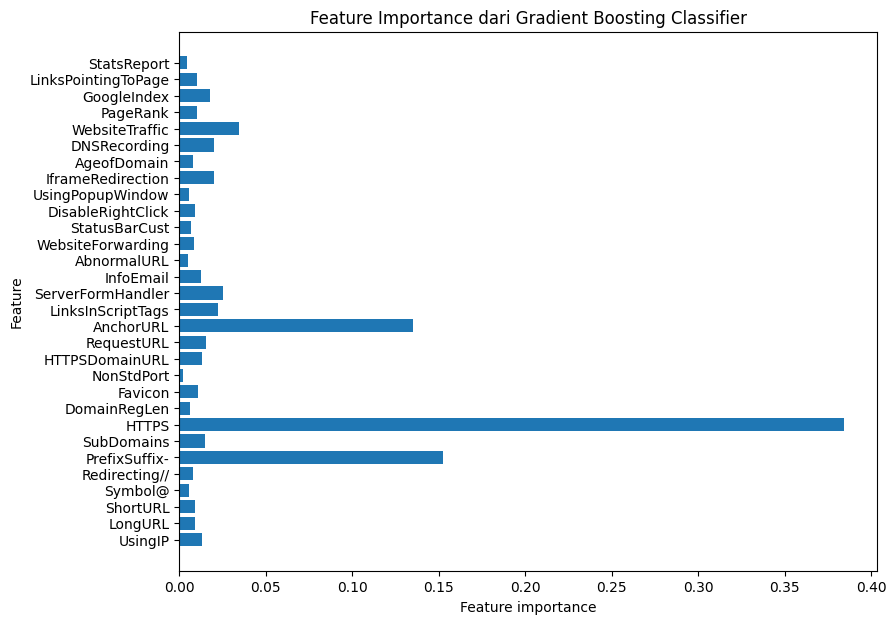

In [74]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature Importance dari Gradient Boosting Classifier")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

End